In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_excel('data mata kuliah wajib.xlsx')
dataset.head(11)

,Jurusan,Pancasila,Bahasa Inggris,Bahasa Indonesia,Semester
0,Teknik Informatika,100,69,80,3
1,Sistem Informasi,90,78,89,1
2,DKV,80,90,87,2
3,Ilmu Komunikasi,70,65,79,1
4,Manajemen,95,95,86,1
5,Biomedis,85,85,83,2
6,Hukum,75,76,82,2
7,Sastra Indonesia,89,89,81,1
8,Sastra Inggris,79,85,76,1
9,Sastra Jepang,95,83,74,2


In [3]:
x = dataset.iloc [:, [2,3]].values
y = dataset.iloc [:, -1 ].values
print(x)
print(y)

[[69 80]
 [78 89]
 [90 87]
 [65 79]
 [95 86]
 [85 83]
 [76 82]
 [89 81]
 [85 76]
 [83 74]
 [72 74]]
[3 1 2 1 1 2 2 1 1 2 2]


In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
print(x_train)
len(x_train)
len(x)
len(x_test)
len(y)
len(y_test)
len(y_train)

[[72 74]
 [76 82]
 [78 89]
 [89 81]
 [85 76]
 [65 79]
 [69 80]
 [85 83]]


8

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train)

[[-0.6759302  -1.52153491]
 [-0.17291238  0.35112344]
 [ 0.07859654  1.9896995 ]
 [ 1.46189556  0.11704115]
 [ 0.95887773 -1.05337032]
 [-1.5562114  -0.35112344]
 [-1.05319357 -0.11704115]
 [ 0.95887773  0.58520574]]


In [6]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1 0]
 [1 1]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


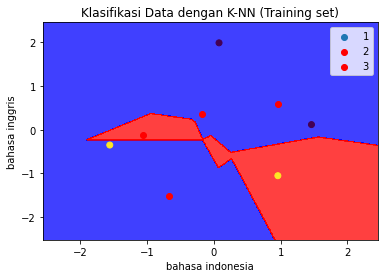

In [7]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                        np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('blue','red')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set==j,1],
    c = ListedColormap(('blue', 'red'))(i), label = j)
plt.title('Klasifikasi Data dengan K-NN (Training set)')
plt.xlabel('bahasa indonesia')
plt.ylabel('bahasa inggris')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


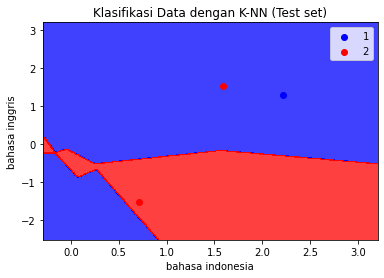

In [8]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1,x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                    np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75, cmap = ListedColormap(('blue','red')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set==j,1],
    c = ListedColormap(('blue', 'red'))(i), label = j)
plt.title('Klasifikasi Data dengan K-NN (Test set)')
plt.xlabel('bahasa indonesia')
plt.ylabel('bahasa inggris')
plt.legend()
plt.show()